<a href="https://colab.research.google.com/github/huyg1108/fruit-fresh-rotten/blob/main/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fruits fresh and rotten

## Import library

In [ ]:
import os
import cv2
import zipfile
import random
import tempfile
from google.colab import files
from random import shuffle
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Download dataset

In [ ]:
!pip install kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"huyg1108","key":"8f0c2c5ab6b826e92d788ee4ce79693c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:04<00:00, 39.9MB/s]
100% 3.58G/3.58G [01:04<00:00, 59.2MB/s]


In [ ]:
# extract file .zip
with zipfile.ZipFile("fruits-fresh-and-rotten-for-classification.zip","r") as zip_ref:
  zip_ref.extractall("/tmp")

## Import dataset

In [ ]:
classes = ['freshapples', 'freshbanana','freshoranges','rottenapples','rottenbanana','rottenoranges']

In [ ]:
# load train set
def load_data_train():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/train')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main,img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y
  
# load test set
def load_data_test():
  x,y = [],[]
  z = []
  for i in tqdm(os.listdir('/tmp/dataset/test')):
    if classes[0] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,0])
    elif classes[1] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,1])
    elif classes[2] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,2])
    elif classes[3] in i:
      path_main = os.path.join('/tmp/dataset/train',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,3])
    elif classes[4] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,4])
    elif classes[5] in i:
      path_main = os.path.join('/tmp/dataset/test',i)
      for img_name in os.listdir(path_main):
        img = cv2.imread(os.path.join(path_main, img_name))
        img = cv2.resize(img,(100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        z.append([img,5])

  shuffle(z)
  for images, labels in tqdm(z):
      x.append(images)
      y.append(labels)
  return x,y

In [ ]:
x_train, y_train = load_data_train()
x_test, y_test = load_data_test()

100%|██████████| 4439/4439 [00:00<00:00, 914600.16it/s]


## Handling dataset

In [ ]:
# chuyển thành numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, stratify=y_train, test_size=0.4, shuffle=True, random_state=42
)

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_val shape:',x_val.shape)
print('y_val shape:',y_val.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (6540, 100, 100, 3)
y_train shape: (6540,)
x_val shape: (4361, 100, 100, 3)
y_val shape: (4361,)
x_test shape: (4439, 100, 100, 3)
y_test shape: (4439,)


In [ ]:
# scale x
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

# to categorical y
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

## Training model

In [ ]:
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *

In [ ]:
set_seed(42)
np.random.seed(42)
clear_session()

# model structure
model = Sequential()

model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
stop =  EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train_ohe, validation_data=(x_val,y_val_ohe), epochs=1000, callbacks=[stop])

Epoch 1/1000
205/205 [==============================] - 38s 24ms/step - loss: 1.3913 - accuracy: 0.4843 - val_loss: 0.5097 - val_accuracy: 0.8232
Epoch 2/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.4526 - accuracy: 0.8370 - val_loss: 0.2980 - val_accuracy: 0.8982
Epoch 3/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.2776 - accuracy: 0.8973 - val_loss: 0.2048 - val_accuracy: 0.9257
Epoch 4/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.1995 - accuracy: 0.9236 - val_loss: 0.2733 - val_accuracy: 0.9119
Epoch 5/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.1846 - accuracy: 0.9350 - val_loss: 0.1475 - val_accuracy: 0.9468
Epoch 6/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.1282 - accuracy: 0.9547 - val_loss: 0.1550 - val_accuracy: 0.9489
Epoch 7/1000
205/205 [==============================] - 4s 19ms/step - loss: 0.1155 - accuracy: 0.9565 - val_loss: 0.1582 - val_a

## Evaluate Model

#### Accuracy

In [ ]:
model.evaluate(x_test, y_test_ohe)

139/139 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9851


[0.057805877178907394, 0.9851318001747131]

#### Learning curve

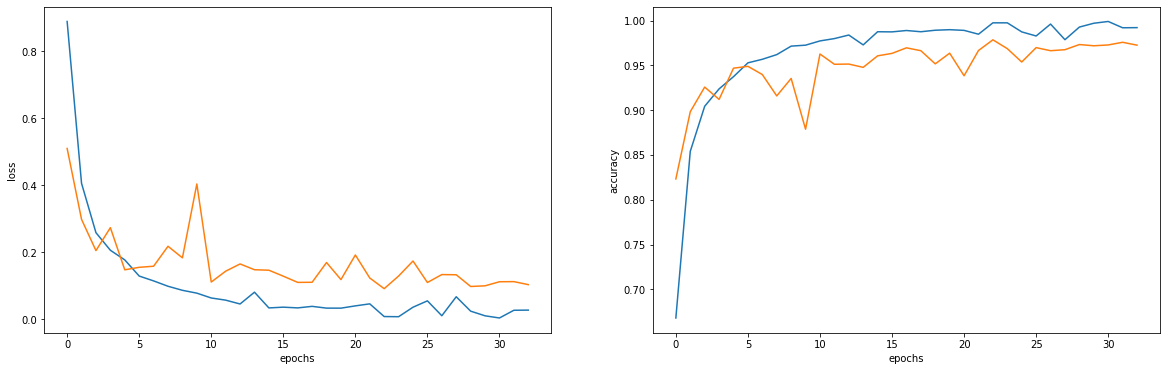

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

139/139 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9851


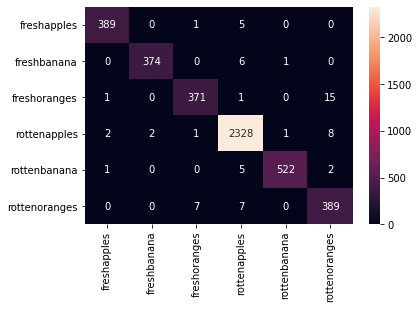

In [ ]:
from sklearn.metrics import *
import seaborn as sns

model.evaluate(x_test,y_test_ohe)

y_pred_test = np.argmax(model.predict(x_test),axis=1)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.show()

## Save model

In [35]:
!mkdir -p saved_model
model.save('saved_model/fruit_model')

INFO:tensorflow:Assets written to: saved_model/fruit_model/assets


In [36]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/fruit_model

fruit_model  my_model
assets	saved_model.pb	variables


In [40]:
fruit_model = tf.keras.models.load_model('saved_model/fruit_model')

## Demo

Saving 186166766_745849459388566_694325421132139537_n.jpeg to 186166766_745849459388566_694325421132139537_n (1).jpeg
Saving 186224592_468096151151747_804447371679601294_n.jpg to 186224592_468096151151747_804447371679601294_n (1).jpg
Saving 186428711_298229688636994_6287137646224686334_n.jpeg to 186428711_298229688636994_6287137646224686334_n (1).jpeg
Saving 186468631_1183720292051949_6039845047617074014_n.jpg to 186468631_1183720292051949_6039845047617074014_n (1).jpg
Saving 186481008_878297902721315_328889538991353883_n.jpeg to 186481008_878297902721315_328889538991353883_n (1).jpeg
Saving 10242377209301_4528867223499192299_n.jpeg to 10242377209301_4528867223499192299_n (1).jpeg
Saving 822917124985087_216544569518940058_n.jpeg to 822917124985087_216544569518940058_n (1).jpeg
Saving received_239907854542485.jpeg to received_239907854542485 (1).jpeg
Saving received_477603563434632.jpeg to received_477603563434632 (1).jpeg
Saving received_582689739372944.jpeg to received_582689739372944

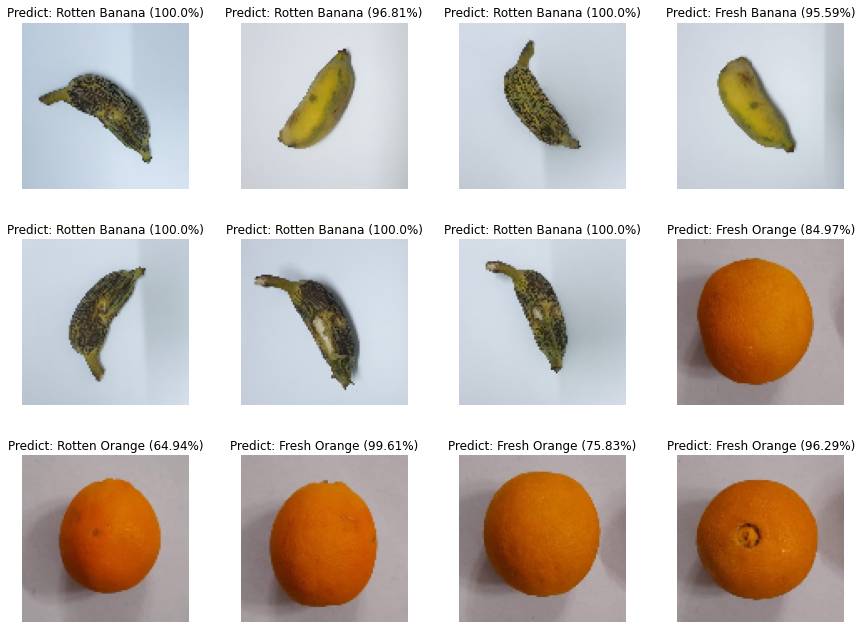

In [41]:
import pathlib
from keras.utils import get_file
from keras.preprocessing import image

uploaded_file = files.upload()
img_name = []
img_conf = []
predict_result = []

for i in uploaded_file.keys():
  path = i
  img = image.load_img(path, color_mode="rgb", target_size=(100, 100), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = fruit_model.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Apple')
  elif np.where(classes[0] == max)[0] == 1:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 2:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Apple')
  elif np.where(classes[0] == max)[0] == 4:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Banana')
  else:
    img_name.append(i)
    img_conf.append(max)
    predict_result.append('Rotten Orange')

plt.figure(figsize=(15, 15))
for i in range(len(img_name)):
  plt.subplot((len(img_name)/4)+1, 4, i+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(img_name[i], color_mode="rgb", target_size=(100, 100), interpolation="nearest"))
  title = f"Predict: {predict_result[i]} ({round(float(img_conf[i])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in img_name:
  os.system(f'rm {fn}')